# **X-ray Chest Detection**

In [1]:
import os
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
%matplotlib inline

# importing tf.keras modules
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import image_dataset_from_directory

print('Dependencies succesfully imported!')

Dependencies succesfully imported!


In [3]:
# getting filepath for each split
train_path = r"dataset/train"
val_path = r"dataset/val"
test_path = r"dataset/test"

# method to create image from keras.utils
def create_dataset(dir):
    return image_dataset_from_directory(
        directory = dir,
        labels = 'inferred',
        label_mode = 'categorical',
        batch_size = 32,
        image_size = (256, 256)
    )


# import files using image_dataset_from_directory
train = create_dataset(train_path)
val = create_dataset(val_path)
test = create_dataset(test_path)

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


In [33]:
def show_sample_img(data, suptitle):
    plt.figure(figsize = (8,8))
    for images, labels in data.take(1):
        for i in range(5):
            ax = plt.subplot(1, 5, i + 1)
            plt.imshow(images[i].numpy().astype('uint8'))
            plt.suptitle(f"'{suptitle}' dataset", fontsize = 14)
            plt.title(train.class_names[np.argmax(labels[i])],
                    fontsize = 10)
            plt.axis('off')
            plt.tight_layout(rect=[0, 0.7, 1, 0.95])

    plt.show()


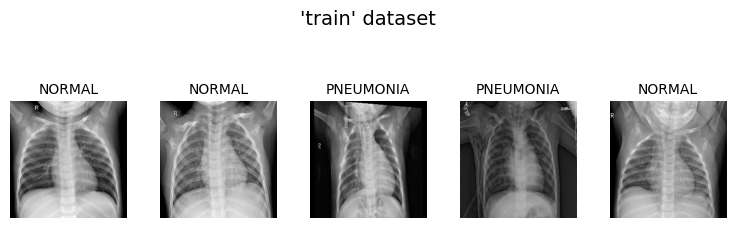

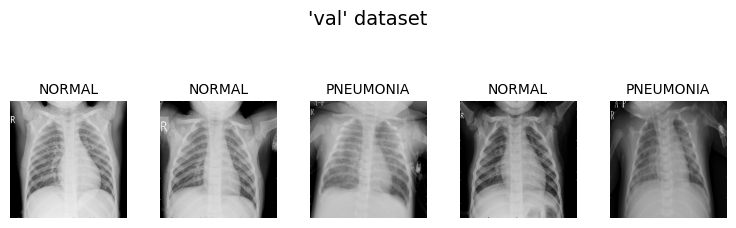

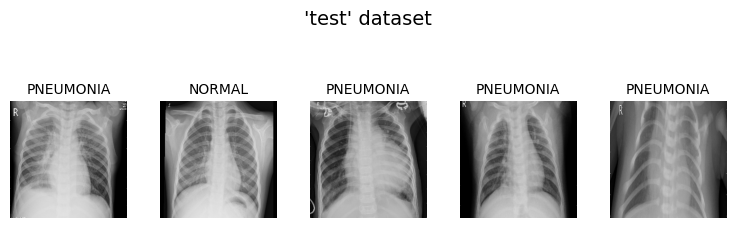

In [34]:
data_splitted = [
    {
        "data": train,
        "name": "train"
    },
        {
        "data": val,
        "name": "val"
    },
            {
        "data": test,
        "name": "test"
    }
]
for data in data_splitted:
    show_sample_img(data['data'], data['name'])